# -RLC circuit with losses

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

### 1) Gain Module

In [145]:
def modG(f, r, rs, c, l):
    
    w = 2 * np.pi *f 
    
    a = (rs/(w*l))**2
    
    b = 2*r/rs
    
    c1 = (w*r*c)**2
    
    d = (r/(w*l))**2
    
    w_0 = 1/(np.sqrt(l*c))
    
    e =(1 - (w/w_0)**2)**2 
        
    nu = (1+a)
    
    de = 1 + a*(1+b+c1)+(d*e)
    
    return np.sqrt(nu/de)

### 2) Phase Difference

In [232]:
def phG(f, r, rs, c, l):
    w = 2*np.pi*f
    
    p1 = r/(w*l)
    
    n1 = (1-(w**2)*l*c)
    n2 = (1 + (rs**2)/((w*l)**2))
    
    d1 = (1+(rs*(rs+r)/((w*l)**2)))
    
    
    return p1*(n1*n2)/(d1)

### 3) Interpolador Ganho

In [248]:
def cutGain(x, y):
    interp = interpolate.interp1d(y, x)
    return interp(0.25/np.sqrt(2))

### 4) Interpolador Fase

In [149]:
def cutPhase(x, y):
    interp = interpolate.interp1d(y, x)
    return interp()

### 5) Graph Experimental Gain

In [297]:
def graphExpGain(x, y, legendax, legenday):
    xticks = [1000, 3000, 5000, 7000, 9000,
             11000,15000,20000]
    plt.plot(x, y, c = 'red', linestyle = 'dashed')
    plt.scatter(x, y, c = 'g', marker = '.')
    
    plt.plot(x[y.index(max(y))], max(y), c = 'b', marker = 'x')
    
    plt.plot([f_c1, f_c2], [G_c]*2, c = 'orange')
    
    plt.xscale("linear")
    plt.xticks(xticks, xticks)
    
    plt.annotate("Frequência \n de Ressonância", xy = (x[y.index(max(y))], max(y)-0.01))
    plt.annotate("("+str(round(x[y.index(max(y))],2))+"," + str(round(max(y),2))+ ")", 
                 xy = ((x[y.index(max(y))]+200, max(y)-0.03)))
    
    
    plt.plot(np.arange(100,20000,100), [G_c]*199, c = 'b',
            linestyle = 'dashed')
    
    plt.annotate("f1\n8771 Hz", xy = (f_c1 - 2500, G_c+0.011))
    
    plt.annotate("f2\n9423 Hz", xy = (f_c2 +1500, G_c+0.011))

    
    
    plt.xlim(1000,20000)
    
    plt.xlabel(legendax)
    plt.ylabel(legenday)
    
    plt.savefig("Ganho_Experimental")
    plt.show()

### 6) Graph Experimental Phase

In [314]:
def graphExpPhase(x, y, legendax, legenday):
    
    xticks = [1000, 3000, 5000, 7000, 9000,
            12000,15000,20000]
    
    #plt.scatter(float(cutPhase(x, y)), -45, c = 'b' , marker = 'o')
    plt.scatter(x, y, c = 'g', marker = '.')
    plt.plot(x, y, c ='r', linestyle = 'dashed')
    
    plt.xscale("linear")
    plt.xticks(xticks, xticks)
    #plt.annotate("Frequência \n de Corte", xy = (cutPhase(x, y), -43))
    #plt.annotate("("+str(round(float(cutPhase(x, y)),2))+", -45)",xy = (cutPhase(x, y)-1200, -45-5) )
    
    plt.xlim(10,20000)
    
    
    plt.xlabel(legendax)
    plt.ylabel(legenday)
    
    plt.savefig("Exp_fase")
    plt.show()
    

## Exemplo

In [152]:
exp_gain = [0.00203431, 0.00623227, 0.0131948, 0.031293, 0.0625361,
           0.111603, 0.183614, 0.252544, 0.249565, 0.218056, 
           0.182436, 0.135087, 0.0851717, 0.0436967, 0.0298968,
           0.0160972, 0.00961162]

In [299]:
exp_freq = np.array([1000, 3000, 5000, 7000, 8000, 8500, 8800, 9000,
           9200, 9300, 9400, 9600, 10000, 11000, 12000, 15000, 20000])

In [304]:
exp_phase = [88, 85.213, 96.8827, 43.1436, 20.8539,
            10.6412, 4.7877, 1.08929, -2.53371, -4.16877, 
            -5.98401, -9.53726, -16.8976, -33.5173, -48.9742, -85.7383,
            -90]

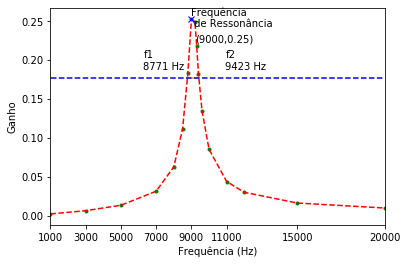

In [298]:
graphExpGain(exp_freq, exp_gain, "Frequência (Hz)", "Ganho")

In [255]:
G_c = 0.25/np.sqrt(2)
G_c

0.17677669529663687

Pelo gráfico determinamos os indices

In [256]:
f_c1 = cutGain(exp_freq[5:7], exp_gain[5:7])
f_c1

array(8771.51558219)

In [257]:
f_c2 = cutGain(exp_freq[10:12], exp_gain[10:12])
f_c2

array(9423.90464298)

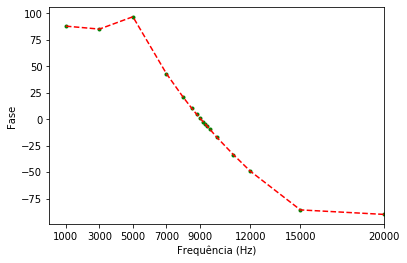

In [315]:
graphExpPhase(exp_freq, exp_phase, "Frequência (Hz)", "Fase")